### Set local path

In [18]:
your_local_path="D:/UpX_Academy/Python_Projects/Project_3_Wine_Quality_data/"


### Import necessary libraries and packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')
from IPython.display import Markdown, display

### Define printmd function to print in BOLD letters.

In [3]:
def printmd(string):
    display(Markdown(string))

### Read Wine dataset and display few top rows.

In [4]:
wine = pd.read_csv(your_local_path+'winequality.csv', sep = ';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Check whether data contains any missing values

In [5]:
print(wine.isnull().sum().sum())
printmd("*Above value shows that dataset is consistent with 0 missing values*")

0


*Above value shows that dataset is consistent with 0 missing values*

### Summarise the quality scores of the wine

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64


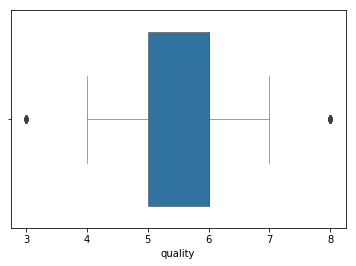

*1. It's evident from the above graph that the mean is somewhat dissolved with the median value which happens to be the boundry of the third quartile as well.*

*2. Secondly graph shows that most of the quality values are either 5 or 6.*

In [6]:
print(wine.quality.describe())
sns.boxplot(wine.quality, linewidth=.5)
plt.show()
printmd("*1. It's evident from the above graph that the mean is somewhat dissolved with the median value which happens to be the boundry of the third quartile as well.*")
printmd("*2. Secondly graph shows that most of the quality values are either 5 or 6.*")

### Wine quality data distribution with histogram

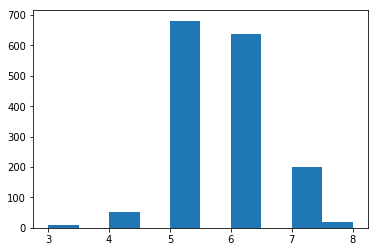

*Above graph shows the actual distribution of quality values across the dataset and it validates that most of the wine quality values are either 5 or 6*

In [7]:
plt.hist(wine.quality)
plt.show()
printmd("*Above graph shows the actual distribution of quality values across the dataset and it validates that most of the wine quality values are either 5 or 6*")

### Calculate the number of outliers in the boxplot representation.

In [19]:
q1=wine.quality.quantile(.25)
q3=wine.quality.quantile(.75)
iqr = q3-q1
outlier_low = wine.quality[wine.quality < (q1 - 1.5*iqr)].count()
outlier_high = outlier_low + wine.quality[wine.quality > (q3 + 1.5*iqr)].count()
printmd("*Number of outliers as per quality data is* : ")
print(outlier_high+outlier_low)

*Number of outliers as per quality data is* : 

38


### Check the correlation of each variable with the quality score

In [9]:
print(wine[['quality','fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].corr()['quality'].sort_values())

printmd("*Above chart shows that wine quality is strongly correlated with Alcohol(++), Volatile Actidity(--) and Sulphates(+)*")

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64


*Above chart shows that wine quality is strongly correlated with Alcohol(++), Volatile Actidity(--) and Sulphates(+)*

### Visualize the correlation of quality with the influential variables

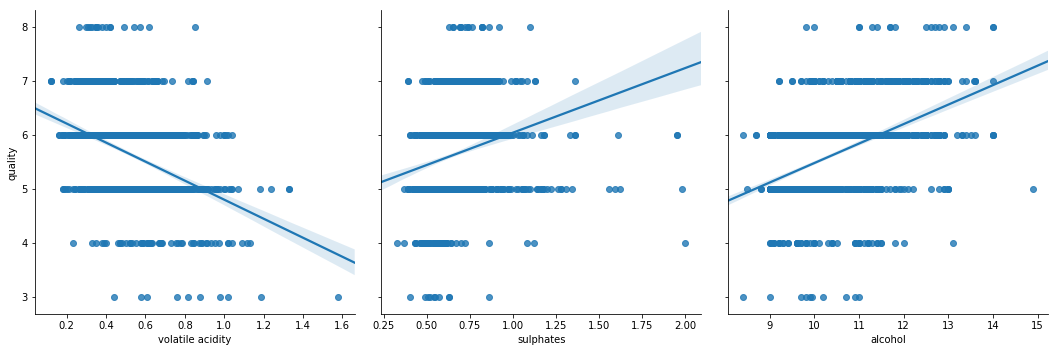

In [10]:
#plt.figure(figsize=(100,10))
sns.pairplot(wine, x_vars=['volatile acidity','sulphates','alcohol'], y_vars=['quality'], kind="reg", size=5, aspect=1)
plt.show()

### Check the average alcohol values distributed accross the different quality scores

In [11]:
print(wine.groupby('quality')['alcohol'].mean())
printmd("\n **Average alcohol quantity tends to increase with quality** \n")
print(wine.groupby('quality')['sulphates'].mean())
printmd("\n **Average suplhate quantity tends to increase with quality** \n")
print(wine.groupby('quality')['volatile acidity'].mean())
printmd("\n **Average volatile acidity value tends to decrease with quality which depicts it can effect the quality negatively**")

quality
3     9.955000
4    10.265094
5     9.899706
6    10.629519
7    11.465913
8    12.094444
Name: alcohol, dtype: float64



 **Average alcohol quantity tends to increase with quality** 


quality
3    0.570000
4    0.596415
5    0.620969
6    0.675329
7    0.741256
8    0.767778
Name: sulphates, dtype: float64



 **Average suplhate quantity tends to increase with quality** 


quality
3    0.884500
4    0.693962
5    0.577041
6    0.497484
7    0.403920
8    0.423333
Name: volatile acidity, dtype: float64



 **Average volatile acidity value tends to decrease with quality which depicts it can effect the quality negatively**

### Divide the wine quality score into three categories i.e. Low, Average, High.

In [12]:
bins = [0,3.3,6.6,10]
wine['cut'] = pd.cut(wine.quality, bins ,labels=['Low','Average','High'])

### Check overview of quality distibution across the dataset grouped by categories.

In [13]:
def get_stats(group):
    return {'min': group.min(), 'max':group.max(), 'mean':group.mean(), 'count':group.count()}

wine.quality.groupby(wine['cut']).apply(get_stats).unstack()

,count,max,mean,min
cut,,,,
Low,10.0,3.0,3.000000,3.0
Average,1372.0,6.0,5.426385,4.0
High,217.0,8.0,7.082949,7.0


### Visualize the distribution of influential variables in different wine categories.

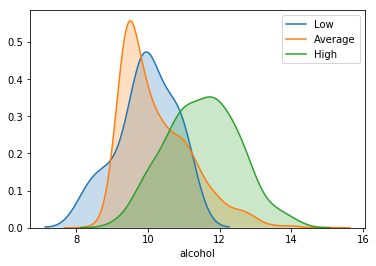

*Above graph indicates that alcohol content is generally more in high quality wine and vice versa*

In [14]:
sns.distplot(wine[wine.cut == 'Low']['alcohol'], hist=False, kde_kws={"shade": True}, label="Low")
sns.distplot(wine[wine.cut == 'Average']['alcohol'], hist=False, kde_kws={"shade": True}, label="Average")
sns.distplot(wine[wine.cut == 'High']['alcohol'], hist=False, kde_kws={"shade": True}, label="High")
plt.show()
printmd("*Above graph indicates that alcohol content is generally more in high quality wine and vice versa*")

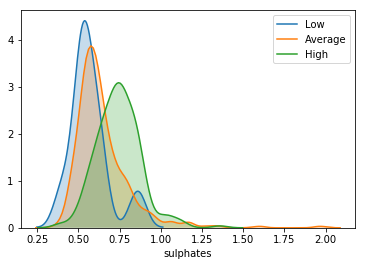

*Above graph indicates that sulphur content also tends to be more in high quality wine and vice versa*

In [15]:
sns.distplot(wine[wine.cut == 'Low']['sulphates'], hist=False, kde_kws={"shade": True}, label="Low")
sns.distplot(wine[wine.cut == 'Average']['sulphates'], hist=False, kde_kws={"shade": True}, label="Average")
sns.distplot(wine[wine.cut == 'High']['sulphates'], hist=False, kde_kws={"shade": True}, label="High")
plt.show()
printmd("*Above graph indicates that sulphur content also tends to be more in high quality wine and vice versa*")

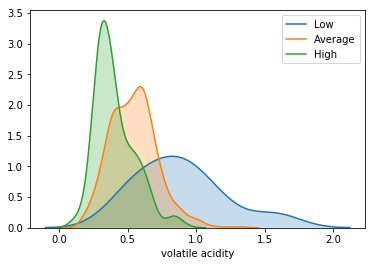

*Above graph indicates that volatile acidity content is generally lesser in high quality wine and vice versa*

In [16]:
sns.distplot(wine[wine.cut == 'Low']['volatile acidity'], hist=False, kde_kws={"shade": True}, label="Low")
sns.distplot(wine[wine.cut == 'Average']['volatile acidity'], hist=False, kde_kws={"shade": True}, label="Average")
sns.distplot(wine[wine.cut == 'High']['volatile acidity'], hist=False, kde_kws={"shade": True}, label="High")
plt.show()
printmd("*Above graph indicates that volatile acidity content is generally lesser in high quality wine and vice versa*")

### Visualize the correlation between different variables of the dataset through heatmap

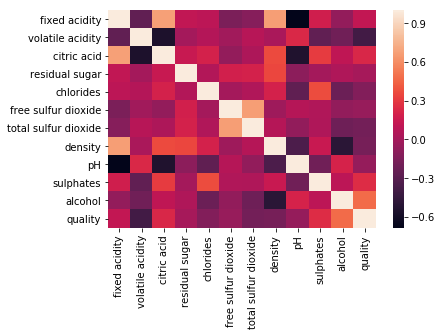

*Above graph summarizes that the quality has a positive correlation with the alcohol and sulphates contents while negative correlation with the volatile acidity, chlorides, density and sulphur dioxide*

In [17]:
sns.heatmap(wine.corr())
plt.show()
printmd("*Above graph summarizes that the quality has a positive correlation with the alcohol and sulphates contents while negative correlation with the volatile acidity, chlorides, density and sulphur dioxide*")